In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

# Generate some fake noisy data.
x = 10 * np.sort(np.random.rand(10))
yerr = 0.2 * np.ones_like(x)
y = np.sin(x) + yerr * np.random.randn(len(x))

In [3]:
import george
from george.kernels import ExpSquaredKernel, MyLocalGaussianKernel, ExpKernel, MyLocalExpSquared

# Set up the Gaussian process.
kernel = ExpSquaredKernel(1.0)
gp = george.GP(kernel)

# Pre-compute the factorization of the matrix.
gp.compute(x, yerr)

# Compute the log likelihood.
print(gp.lnlikelihood(y))

-6.36499105841


In [4]:
t = np.linspace(0, 10, 500)
mu, cov_ = gp.predict(y, t)
std_ = np.sqrt(np.diag(cov_))

see https://github.com/mfrate28/GuassianProcesses/blob/master/DijetsResiduals.ipynb

<Container object of 3 artists>

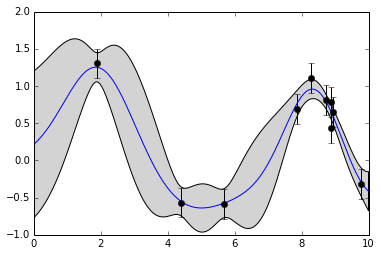

In [5]:
plt.fill_between(t,mu-std_,mu+std_,facecolor='lightgray')
plt.plot(t,mu)
plt.errorbar(x,y,marker='o',ls='None', yerr=yerr,c='black')

In [6]:
# Set up the Gaussian process.
kernel = MyLocalGaussianKernel(a=0,b=0.0)
gp = george.GP(kernel)

# Pre-compute the factorization of the matrix.
gp.compute(x, yerr=10)

# Compute the log likelihood.
print(gp.lnlikelihood(y))

-32.2922064122


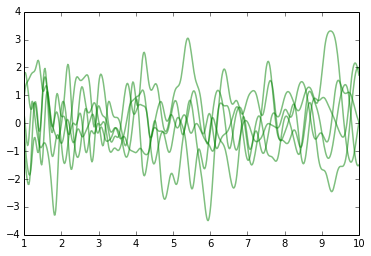

In [39]:
x = np.linspace(1,10, 500)
kernelexp = MyLocalGaussianKernel(a=.01, b=-0.001)
kernelgaus = ExpSquaredKernel(.1)
#kernelexp = ExpKernel(1.0)
kernelexp = MyLocalExpSquared(a=0.011,b=0.005);

kernel = 1*kernelexp + 0.001*kernelgaus
#kernel = kernelgaus
kernel = kernelexp


gp = george.GP(kernel)
gp.compute(x, yerr=0)
y = gp.sample(size=5)

plt.plot(x, y.T, "g", lw=1.5, alpha=0.5)
plt.xlim(1, 10);

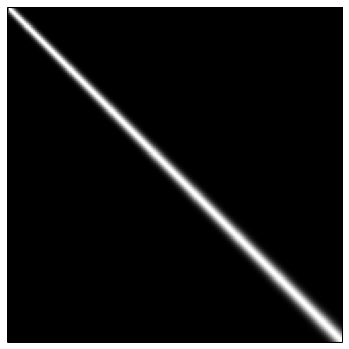

In [40]:
k = kernel.get_value(np.atleast_2d(x).T)
plt.figure(figsize=(6, 6))
plt.imshow(k, cmap="gray", interpolation="nearest")
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([]);

In [41]:
kernel.get_value(np.atleast_2d(np.array([1,2,3])).T)

array([[  1.00000000e+00,   3.34674482e-24,   1.89339638e-83],
       [  3.34674482e-24,   1.00000000e+00,   3.30661589e-19],
       [  1.89339638e-83,   3.30661589e-19,   1.00000000e+00]])

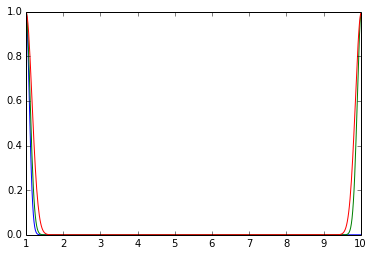

In [43]:
plt.plot(x,np.roll(k[0],-0))
plt.plot(x,np.roll(k[100],-100))
plt.plot(x,np.roll(k[399],-399))
#plt.semilogy()
#plt.loglog()

In [ ]:
ExpSquaredKernel?